Submission Untuk Proyek akhir Kelas Mechine Learning Pemula

KLASIFIKASI GAMBAR : PAPER, ROCK, SCISSORS

Riza Fachmi Munggaran

Bandung, 29 Mei 2021

In [1]:
import tensorflow as tf

Upload File ke Google Colab

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-29 12:04:48--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.12MB/s    in 5m 8s   

2021-05-29 12:09:58 (1022 KB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Extract File

In [3]:
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Tentukan path yang akan digunakan untuk directory validation, train, train_split maupun file katagori didalamnya

(rock, paper, scissor)

In [4]:
import os

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

os.mkdir(train_dir)
os.mkdir(validation_dir)

os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)

os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)


cek apakah directory train dan val yang telah dibuat sudah sesuai

In [5]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images/train')

['scissors', 'paper', 'rock']

In [6]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images/val')

['scissors', 'paper', 'rock']

gunakan train_test_spilit untuk membagi file menjadi train dan validasi dengan validasi berjumlah 40% dari total data


In [7]:
from sklearn.model_selection import train_test_split

train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

copykan file ke dalam directory yang telah dibuat sebelumnya

In [8]:
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

Gunakan library ImageDataGenerator untuk mengaugmentasi image

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

Persiapkan data latih yang telah diaugemntasi oleh ImageDataGenerator

In [10]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (150, 150),
        batch_size = 4,
        class_mode = 'categorical',
        shuffle = True
)

validation_generator  = train_datagen.flow_from_directory(
        validation_dir,
        target_size = (150, 150),
        batch_size = 4,
        shuffle = False,
        class_mode = 'categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


Didapatkan 1312 data train dan 876 data validasi yang terbagi menjadi 3 kelas (sesuai dengan kriteria 40% data validasi dari data seluruhnya)

Selanjutnya buat model latih dengan tensorflow keras menggunakan arsitektur CNN

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

Tentukan loss funcion dan optimizer untuk model latih

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Latih model dengan menggunakan metode fit

In [16]:
model.fit(
      train_generator,
      steps_per_epoch= 40,  
      epochs= 20, 
      validation_data = validation_generator, 
      validation_steps=5,  
      verbose=2)

Epoch 1/20
40/40 - 11s - loss: 0.2313 - accuracy: 0.9312 - val_loss: 0.6029 - val_accuracy: 0.7500
Epoch 2/20
40/40 - 11s - loss: 0.1501 - accuracy: 0.9500 - val_loss: 0.2871 - val_accuracy: 0.9000
Epoch 3/20
40/40 - 11s - loss: 0.1556 - accuracy: 0.9563 - val_loss: 0.3619 - val_accuracy: 0.8000
Epoch 4/20
40/40 - 11s - loss: 0.1061 - accuracy: 0.9625 - val_loss: 0.4905 - val_accuracy: 0.8500
Epoch 5/20
40/40 - 11s - loss: 0.3090 - accuracy: 0.8875 - val_loss: 0.5122 - val_accuracy: 0.8000
Epoch 6/20
40/40 - 11s - loss: 0.1625 - accuracy: 0.9688 - val_loss: 0.4674 - val_accuracy: 0.8000
Epoch 7/20
40/40 - 11s - loss: 0.1330 - accuracy: 0.9563 - val_loss: 0.3251 - val_accuracy: 0.8500
Epoch 8/20
40/40 - 11s - loss: 0.0977 - accuracy: 0.9563 - val_loss: 0.1890 - val_accuracy: 0.9000
Epoch 9/20
40/40 - 11s - loss: 0.1541 - accuracy: 0.9750 - val_loss: 0.5896 - val_accuracy: 0.8500
Epoch 10/20
40/40 - 11s - loss: 0.2170 - accuracy: 0.9312 - val_loss: 0.1507 - val_accuracy: 0.9500
Epoch 11/

Buat sebuah code input gambar, modifikasi (resize) dan prediksi menggunakan model yang telah dibuat

Saving 63754.jpg to 63754.jpg
63754.jpg
Paper


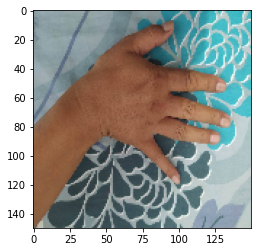

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
print(fn)
if classes[0,0] != 0:
  print('Paper')
elif classes[0,1] != 0 :
  print('Rock')
else :
  print('Scissors')